In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("edumagalhaes/quality-prediction-in-a-mining-process")

Using Colab cache for faster access to the 'quality-prediction-in-a-mining-process' dataset.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import os

In [3]:
print(os.listdir(path))

['MiningProcess_Flotation_Plant_Database.csv']


In [4]:
csv_path = os.path.join(path, "MiningProcess_Flotation_Plant_Database.csv")
df = pd.read_csv(csv_path)

In [5]:
df.shape

(737453, 24)

In [6]:
print(df.columns)

Index(['date', '% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
       'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level',
       '% Iron Concentrate', '% Silica Concentrate'],
      dtype='object')


In [8]:
Iron_concentration_col = "% Iron Concentrate"

In [9]:
df.drop(columns=["% Iron Concentrate"], inplace=True)

In [10]:
print(df.columns)

Index(['date', '% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
       'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level',
       '% Silica Concentrate'],
      dtype='object')


In [11]:
# Check the first few rows
print("First 5 rows of the dataset:")
print(df.head())
print("\n")

First 5 rows of the dataset:
                  date % Iron Feed % Silica Feed Starch Flow Amina Flow  \
0  2017-03-10 01:00:00        55,2         16,98     3019,53    557,434   
1  2017-03-10 01:00:00        55,2         16,98     3024,41    563,965   
2  2017-03-10 01:00:00        55,2         16,98     3043,46    568,054   
3  2017-03-10 01:00:00        55,2         16,98     3047,36    568,665   
4  2017-03-10 01:00:00        55,2         16,98     3033,69    558,167   

  Ore Pulp Flow Ore Pulp pH Ore Pulp Density Flotation Column 01 Air Flow  \
0       395,713     10,0664             1,74                      249,214   
1       397,383     10,0672             1,74                      249,719   
2       399,668      10,068             1,74                      249,741   
3       397,939     10,0689             1,74                      249,917   
4       400,254     10,0697             1,74                      250,203   

  Flotation Column 02 Air Flow  ... Flotation Column 06 A

In [12]:
# Check data types and missing values
print("Data types and missing values:")
print(df.info())
print("\n")

Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 23 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   date                          737453 non-null  object
 1   % Iron Feed                   737453 non-null  object
 2   % Silica Feed                 737453 non-null  object
 3   Starch Flow                   737453 non-null  object
 4   Amina Flow                    737453 non-null  object
 5   Ore Pulp Flow                 737453 non-null  object
 6   Ore Pulp pH                   737453 non-null  object
 7   Ore Pulp Density              737453 non-null  object
 8   Flotation Column 01 Air Flow  737453 non-null  object
 9   Flotation Column 02 Air Flow  737453 non-null  object
 10  Flotation Column 03 Air Flow  737453 non-null  object
 11  Flotation Column 04 Air Flow  737453 non-null  object
 12  Flotation Column 05 Air Flo

In [13]:
# Summary statistics
print("Summary statistics:")
print(df.describe())
print("\n")

Summary statistics:
                       date % Iron Feed % Silica Feed Starch Flow Amina Flow  \
count                737453      737453        737453      737453     737453   
unique                 4097         278           293      409317     319416   
top     2017-09-09 23:00:00       64,03          6,26      2562,5    534,668   
freq                    180      142560        142560         690        959   

       Ore Pulp Flow Ore Pulp pH Ore Pulp Density  \
count         737453      737453           737453   
unique        180189      131143           105805   
top          402,246     10,0591             1,75   
freq            1735        1509             3214   

       Flotation Column 01 Air Flow Flotation Column 02 Air Flow  ...  \
count                        737453                       737453  ...   
unique                        43675                        80442  ...   
top                         299,927                      255,322  ...   
freq                 

In [14]:
# Check for missing values
print("Missing values count:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])
print(f"Total missing values: {df.isnull().sum().sum()}")
print("\n")

Missing values count:
Series([], dtype: int64)
Total missing values: 0




In [15]:
# Fix data format issues - replace commas with dots and convert to float
for column in df.columns:
    if df[column].dtype == 'object':
        try:
            df[column] = df[column].str.replace(',', '.').astype(float)
        except:
            pass

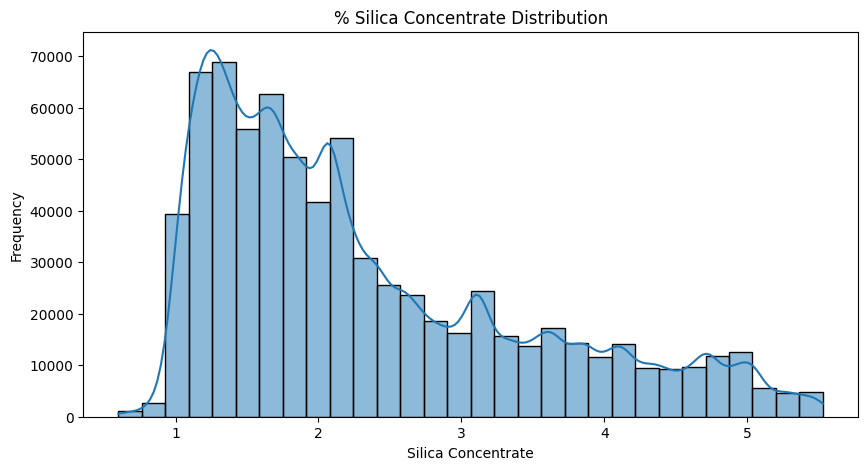

In [16]:
# Histogram with KDE (Kernel Density Estimate)
plt.figure(figsize=(10,5))
sns.histplot(df['% Silica Concentrate'], bins=30, kde=True)
plt.title('% Silica Concentrate Distribution')
plt.xlabel('Silica Concentrate')
plt.ylabel('Frequency')
plt.show()

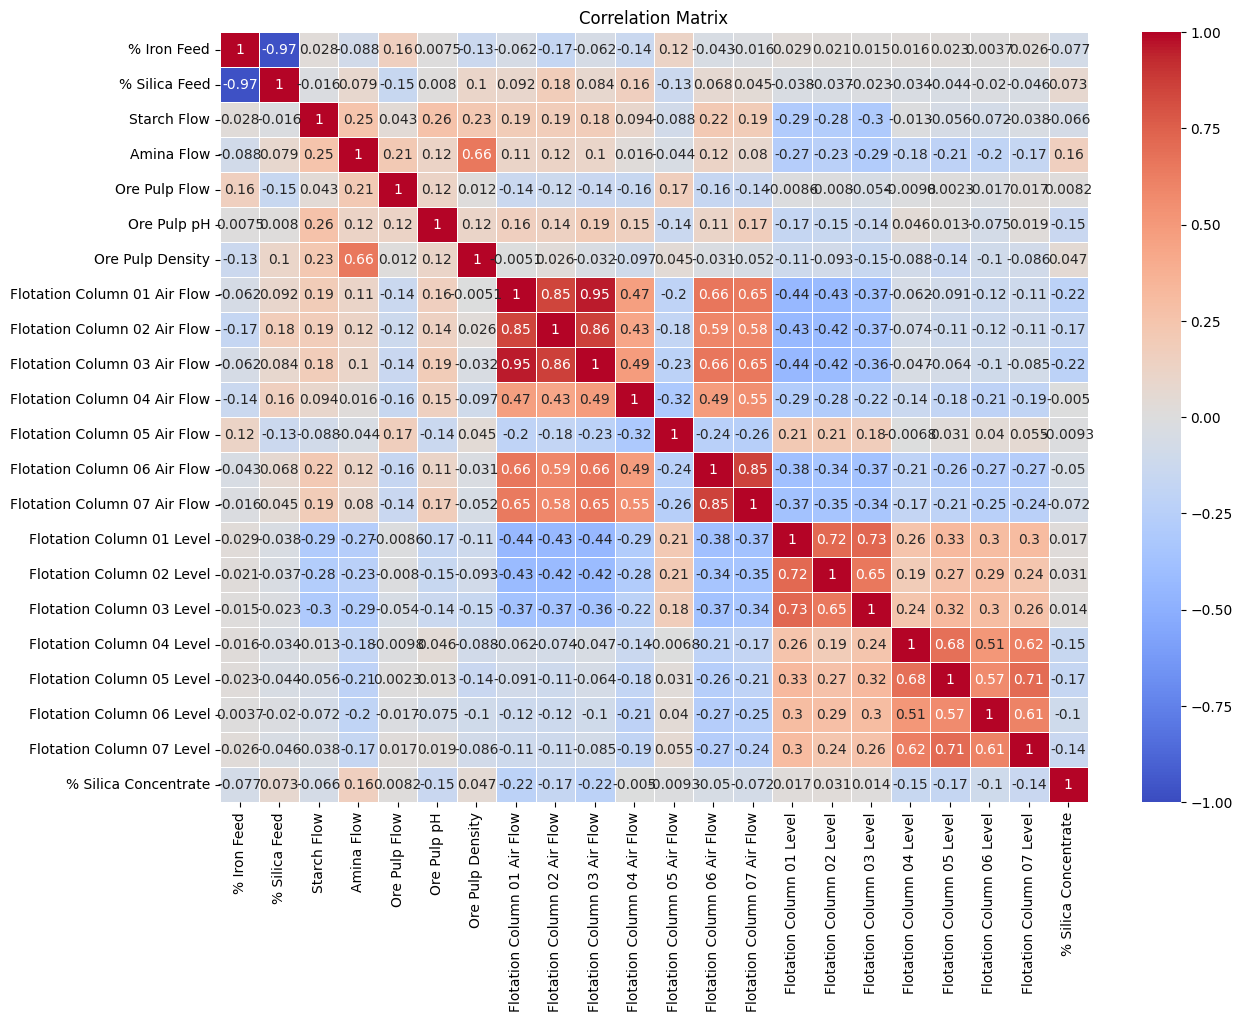

In [17]:
# Convert 'date' column to datetime if not already
df['date'] = pd.to_datetime(df['date'])

# Extract only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Optional: create a mask to hide the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmax=1, vmin=-1)
plt.title('Correlation Matrix')
plt.savefig('correlation_matrix.png')
plt.show()

In [18]:
target_column = '% Silica Concentrate'

In [19]:
# Define features and target
X = df.drop(target_column, axis=1)
y = df[target_column]

In [20]:
# Remove any columns that still have NaN values
X = X.select_dtypes(include=['number'])  # Keep only numeric columns
X = X.fillna(X.median())  # Final cleaning of any remaining NaN

In [21]:
# Split data into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [22]:
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (663707, 21)
Test set size: (73746, 21)


In [23]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
print(X_train_scaled.shape)
print(X_test_scaled.shape)

(663707, 21)
(73746, 21)


In [27]:
print(X_train_scaled)

[[-2.11590839  2.38667244 -0.86445737 ...  0.16515596  0.19518922
   0.61530518]
 [ 0.08835058 -0.16339684 -2.05353386 ... -0.181103   -0.37728153
  -0.17814305]
 [ 0.09222791 -0.39255054 -1.41581409 ...  0.12610954 -0.40949643
   0.25163013]
 ...
 [-0.21795805 -0.0444132  -1.53636597 ... -1.13109069 -1.12424223
  -1.42309099]
 [ 0.38108858 -0.26034648  0.28814007 ...  0.26502015  0.58578374
   0.25802444]
 [-0.53977598  0.27434546 -0.33379308 ...  0.09412697 -0.01395176
  -0.42355276]]


In [28]:
model = RandomForestRegressor(random_state=42)

In [29]:
# Train and evaluate the model

print(f"Training on the train dataset using Random Forest.....")
model.fit(X_train_scaled, y_train)
print("Training done...")


# Prediction on the validation sets
print(f"Evaluating on the test dataset using Random Forest.....")
y_test_pred = model.predict(X_test_scaled)
print("Evaluation done...")
# Calculate metrics
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

Training on the train dataset using Random Forest.....
Training done...
Evaluating on the test dataset using Random Forest.....
Evaluation done...


In [30]:
print(f"Random Forest Testing Results:")
print(f" Testing RMSE: {test_rmse:.4f}")
print(f" Testing MAE: {test_mae:.4f}")
print(f" Testing R²: {test_r2:.4f}")

Random Forest Testing Results:
 Testing RMSE: 0.1926
 Testing MAE: 0.0774
 Testing R²: 0.9707


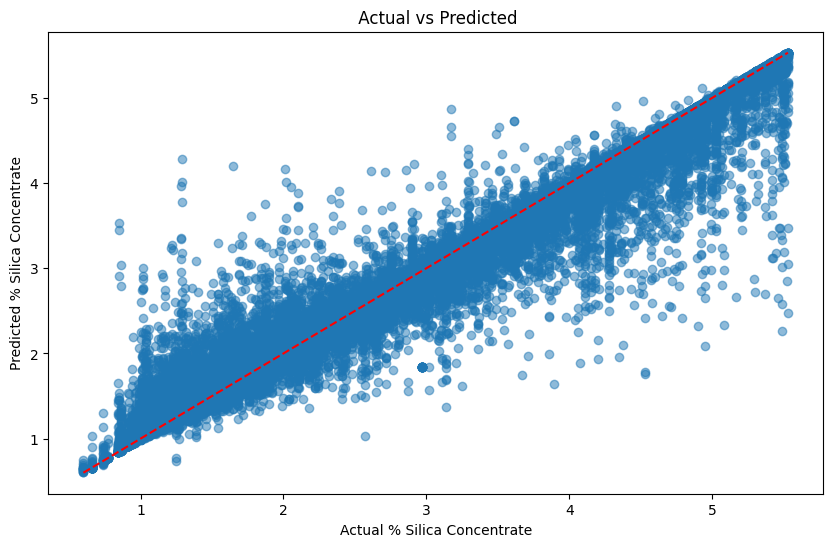

In [31]:
# Visualize predictions vs actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual % Silica Concentrate')
plt.ylabel('Predicted % Silica Concentrate')
plt.title(f' Actual vs Predicted')
plt.savefig('actual_vs_predicted.png')
plt.show()
plt.close()

Top 15 most important features:
                         Feature  Importance
1                  % Silica Feed    0.125890
5                    Ore Pulp pH    0.124151
0                    % Iron Feed    0.102968
3                     Amina Flow    0.092659
10  Flotation Column 04 Air Flow    0.082561
6               Ore Pulp Density    0.080185
9   Flotation Column 03 Air Flow    0.051109
11  Flotation Column 05 Air Flow    0.049799
16     Flotation Column 03 Level    0.044842
14     Flotation Column 01 Level    0.044466
2                    Starch Flow    0.039025
18     Flotation Column 05 Level    0.035573
15     Flotation Column 02 Level    0.025605
12  Flotation Column 06 Air Flow    0.017421
7   Flotation Column 01 Air Flow    0.017119


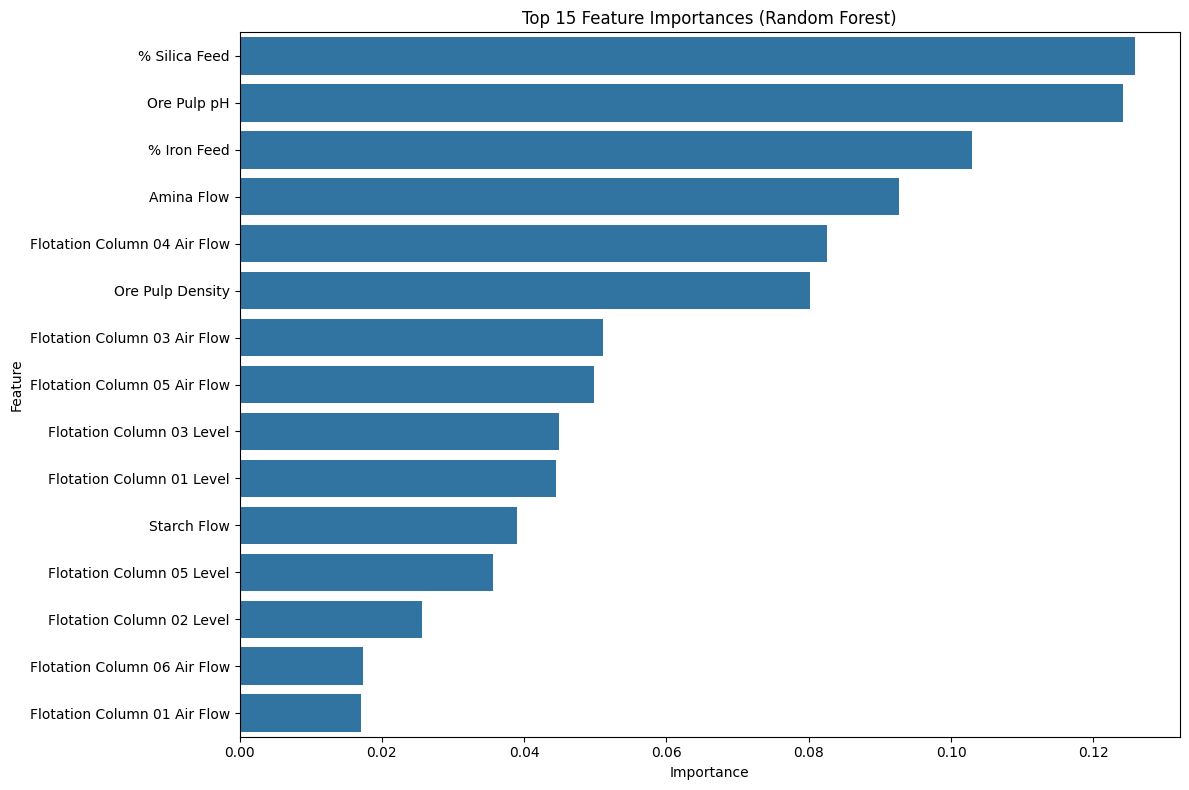

In [32]:
# Feature Importance for Random Forest model

# Get feature importances from your trained model `rf`
feature_importances = model.feature_importances_
feature_names = X.columns

# Create DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display top 15 features
print("Top 15 most important features:")
print(importance_df.head(15))

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(15))
plt.title('Top 15 Feature Importances (Random Forest)')
plt.tight_layout()
plt.show()
